In [4]:
# This block allows us to import from the benchmark folder,
# as if it was a package installed using pip
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from attrbench.evaluation import result, insertion_deletion_curves
from os import path
import os
import pickle as pkl
import json
mpl.rcParams['figure.dpi'] = 150

## Load and plot experiment data

Gradient: [0.42 - 0.42 - 0.42]
SmoothGrad: [0.33 - 0.33 - 0.33]
InputXGradient: [0.62 - 0.62 - 0.62]
IntegratedGradients: [0.55 - 0.55 - 0.55]
GuidedBackprop: [0.26 - 0.26 - 0.26]
Deconvolution: [0.41 - 0.41 - 0.41]
GuidedGradCAM: [0.26 - 0.26 - 0.26]
GradCAM: [0.00 - 0.00 - 0.00]


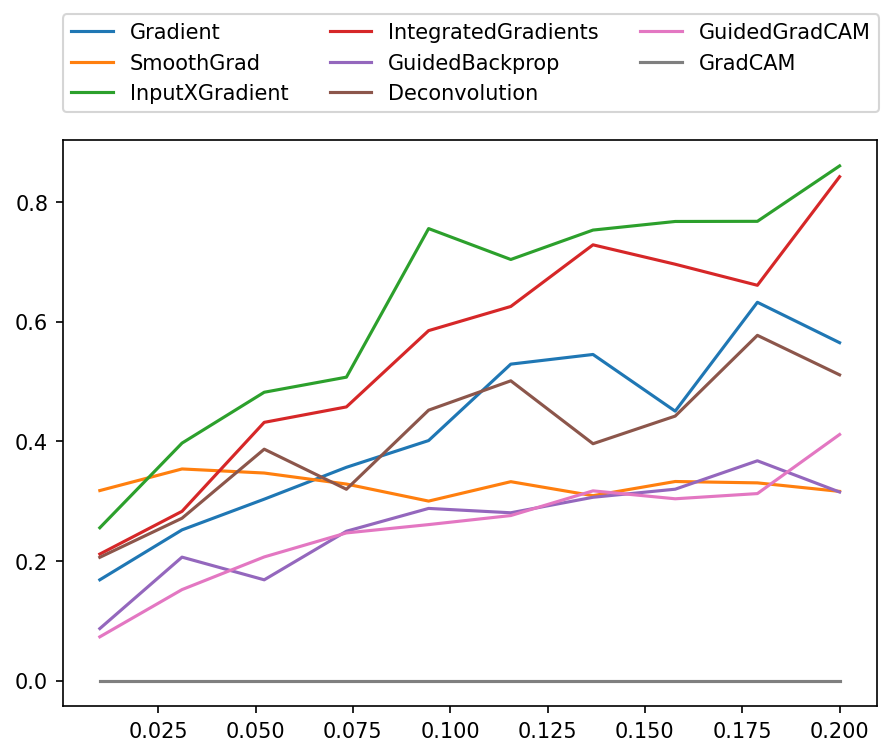

In [6]:
data = json.load(open("../scripts/result.json", "r"))
data["x_range"] = data["x_range"]
res = result.LinePlotResult(**data)
fig, ax = res.plot(ci=True)
auc = res.auc()
for method in auc:
    print(f"{method}: [{auc[method]['lower']:.2f} - {auc[method]['mean']:.2f} - {auc[method]['upper']:.2f}]")

# data = json.load(open("../out/transforms/deletion_imagenette_id.json", "r"))
data["x_range"] = [0] + data["x_range"] + [32*32]
res = result.LinePlotResult(**data)
fig, ax = res.plot(ci=True)
auc = res.auc()
for method in auc:
    print(f"{method}: [{auc[method]['lower']:.2f} - {auc[method]['mean']:.2f} - {auc[method]['upper']:.2f}]")

In [ ]:
fig.savefig("fig2.png", bbox_inches="tight")

## Plot using old code

In [ ]:
lineplot("../out/mnist/sensitivity_n/", x="n", y="correlation")

## Convert experiment results (deletion/insertion curves)

In [ ]:
def convert_result(in_filename, out_filename):
    df = pkl.load(open(in_filename, "rb"))
    x_range = df["insertion"].unique()
    methods = df["method"].unique()
    raw = {}
    for method in methods:
        raw[method] = df[df["method"] == method][["difference"]].values.reshape((-1, len(x_range)))
    result = {
        "data": raw,
        "x_range": x_range
    }
    pkl.dump(result, open(out_filename, "wb"))

In [ ]:
res_dir = "../out/imagenette/insertion_curves"
convert_result(path.join(res_dir, "result.pkl"), path.join(res_dir, "result_new.pkl"))

## Convert experiment results (sensitivity-n)

In [ ]:
#def convert_result_sens_n(in_filename, out_filename):
res_dir = "../out/imagenette/sensitivity_n"
in_filename = path.join(res_dir, "result.pkl")
df = pkl.load(open(in_filename, "rb"))

In [ ]:
df

In [ ]:
def convert_result_sens_n(in_filename, out_filename):
    df = pkl.load(open(in_filename, "rb"))
    x_range = df["n"].unique()
    methods = df["method"].unique()
    raw = {}
    for method in methods:
        raw[method] = df[df["method"] == method][["correlation"]].values.reshape((-1, len(x_range)))
    result = {
        "data": raw,
        "x_range": x_range
    }
    pkl.dump(result, open(out_filename, "wb"))

In [ ]:
res_dir = "../out/cifar10_old/sensitivity_n"
convert_result_sens_n(path.join(res_dir, "result.pkl"), path.join(res_dir, "result_new.pkl"))